linkedin :https://www.linkedin.com/in/mohammad-aamir-rangrez-727694212

GitHub : https://github.com/Mohammad-Aamir-Rangrez/Indian_Politics.git

# Introduction to the analysis
India is a country, divided into states and union territories, with a parliamentary system governed under the Constitution of India, which defines the power distribution among the federal government and the states. Election Commission is a federal body, enacted under the provisions of the Constitution, responsible for monitoring and administering all the electoral processes of India. This body is responsible for ensuring elections are free and fair, without any bias

The Analysis here is based on the election to Lok Sabha (The General Elections) for the year 2019 Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India, from a set of candidates who stand in their respective constituencies. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers. The house meets in the Lok Sabha Chambers of the Sansad Bhavan in New Delhi, on matters relating to creation of new laws, removing or improving the existing laws that affect all citizens of India.

# Presenting an view before going into the Analysis


In [1]:
import numpy as np
import pandas as pd
import os
for dirname,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import os, sys
from collections import defaultdict
from urllib.request import urlopen
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected= True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Lets Check out the Data

In [2]:
vote = pd.read_csv('LS_2.0.csv')
vote.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0   MALE              52  52.0       ST      12th Pass   
1   MALE               0  54.0       ST  Post Graduate   
2   MALE               3  52.0       ST      12th Pass   
3    NaN             NaN   NaN      NaN            NaN   
4   MALE               5  58.0       SC      Doctorate   

                        ASSETS                  LIABILITIES  GENERAL\nVOTES  \
0    Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+          376892   
1  Rs 1,84,77,888\n ~ 1 Crore+      Rs 8,47,000\n ~ 8 Lacs+          318665   
2  Rs 3,64,91,000\n ~ 3 Crore+  Rs 1,53,00,000\n ~ 1 Crore+          314057   
3                          NaN                          NaN           13030   
4  Rs 7,42,74,036\n ~ 7 Crore+    Rs 86,06,522\n ~ 86 Lacs+          644459   

   POSTAL\nVOTES  TOTAL\nVOTES  OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0            482        377374                              25.330684   
1            149        318814                              21.399929   
2            181        314238                              21.092771   
3              6         13036                               0.875023   
4           2416        646875                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

# To help our Analysis, lets go for some...

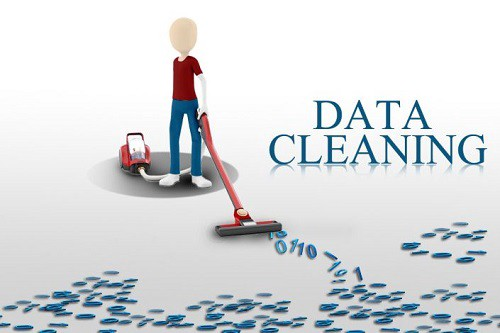

Identifying the Null values in the columns

In [3]:
vote.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [4]:
vote[vote.SYMBOL.isnull()== True]['NAME'].unique()

array(['NOTA'], dtype=object)

Cleaning up the Assets and liabilities columns

In [5]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
vote['ASSETS'] = vote['ASSETS'].apply((value_cleaner))
vote['LIABILITIES'] = vote['LIABILITIES'].apply((value_cleaner))
vote.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION    ASSETS LIABILITIES  \
0   MALE              52  52.0       ST      12th Pass   3099414      231450   
1   MALE               0  54.0       ST  Post Graduate  18477888      847000   
2   MALE               3  52.0       ST      12th Pass  36491000    15300000   
3    NaN             NaN   NaN      NaN            NaN         0           0   
4   MALE               5  58.0       SC      Doctorate  74274036     8606522   

   GENERAL\nVOTES  POSTAL\nVOTES  TOTAL\nVOTES  \
0          376892            482        377374   
1          318665            149        318814   
2          314057            181        314238   
3           13030              6         13036   
4          644459           2416        646875   

   OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0                              25.330684   
1                              21.399929   
2                              21.092771   
3                               0.875023   
4                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

In [6]:
vote.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [7]:
vote.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES","GENERAL\nVOTES": "GENERAL VOTES","POSTAL\nVOTES":"POSTAL VOTES","TOTAL\nVOTES":"TOTAL VOTES","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY":"OVER TOTAL VOTES POLLED IN CONSTITUENCY","OVER TOTAL ELECTORS \nIN CONSTITUENCY":"OVER TOTAL ELECTORS IN CONSTITUENCY"},inplace=True)
vote.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL CASES   AGE CATEGORY      EDUCATION    ASSETS LIABILITIES  \
0   MALE             52  52.0       ST      12th Pass   3099414      231450   
1   MALE              0  54.0       ST  Post Graduate  18477888      847000   
2   MALE              3  52.0       ST      12th Pass  36491000    15300000   
3    NaN            NaN   NaN      NaN            NaN         0           0   
4   MALE              5  58.0       SC      Doctorate  74274036     8606522   

   GENERAL VOTES  POSTAL VOTES  TOTAL VOTES  \
0         376892           482       377374   
1         318665           149       318814   
2         314057           181       314238   
3          13030             6        13036   
4         644459          2416       646875   

   OVER TOTAL ELECTORS IN CONSTITUENCY  \
0                            25.330684   
1                            21.399929   
2                            21.092771   
3                             0.875023   
4                            33.383823   

   OVER TOTAL VOTES POLLED IN CONSTITUENCY  TOTAL ELECTORS  
0                                35.468248         1489790  
1                                29.964370         1489790  
2                                29.534285         1489790  
3                                 1.225214         1489790  
4                                56.464615         1937690

Cleaning up the Educational Qualification of the election Contestants

In [8]:
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [9]:
vote.EDUCATION.replace({'Post Graduate\n':'Post Graduate'},inplace=True)
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

Identifying the Data Type of the columns

In [10]:
vote.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

Indentifying Disrepancy entries in the columns

In [11]:
vote[vote['CRIMINAL CASES'] == 'Not Available'].head()

STATE CONSTITUENCY                    NAME  WINNER PARTY  \
468          Bihar        BUXAR  Ramchandra Singh Yadav       0   IND   
532     Tamil Nadu  CHIDAMBARAM             SIVAJOTHI M       0   NTK   
612  Uttar Pradesh       DEORIA     BINOD KUMAR JAISWAL       0   BSP   
613  Uttar Pradesh       DEORIA             NIYAZ AHMED       0   INC   
654     Tamil Nadu     DINDIGUL          JOTHIMUTHU, K.       0   PMK   

          SYMBOL GENDER CRIMINAL CASES   AGE CATEGORY      EDUCATION ASSETS  \
468      Almirah   MALE  Not Available  42.0  GENERAL  Not Available      0   
532  Ganna Kisan   MALE  Not Available  35.0       SC  Not Available      0   
612     Elephant   MALE  Not Available  56.0  GENERAL  Not Available      0   
613         Hand   MALE  Not Available  57.0  GENERAL  Not Available      0   
654        Mango   MALE  Not Available  48.0  GENERAL  Not Available      0   

    LIABILITIES  GENERAL VOTES  POSTAL VOTES  TOTAL VOTES  \
468           0          10721             9        10730   
532           0          37329           142        37471   
612           0         327728          2985       330713   
613           0          50749           307        51056   
654           0         206782           769       207551   

     OVER TOTAL ELECTORS IN CONSTITUENCY  \
468                             0.586540   
532                             2.531445   
612                            18.852693   
613                             2.910509   
654                            13.460896   

     OVER TOTAL VOTES POLLED IN CONSTITUENCY  TOTAL ELECTORS  
468                                 1.087175         1829373  
532                                 3.246331         1480222  
612                                32.563441         1754195  
613                                 5.027196         1754195  
654                                17.877979         1541881

Updating the data types for the analysis

In [12]:
vote['ASSETS'] = pd.to_numeric(vote['ASSETS'])
vote['LIABILITIES'] = pd.to_numeric(vote['LIABILITIES'])
vote['CRIMINAL CASES'].replace({np.NaN:0})
vote['CRIMINAL CASES'] = pd.to_numeric(vote['CRIMINAL CASES'],
errors='coerce').fillna(0).astype(np.int64)

In [13]:
vote.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER  CRIMINAL CASES   AGE CATEGORY      EDUCATION    ASSETS  LIABILITIES  \
0   MALE              52  52.0       ST      12th Pass   3099414       231450   
1   MALE               0  54.0       ST  Post Graduate  18477888       847000   
2   MALE               3  52.0       ST      12th Pass  36491000     15300000   
3    NaN               0   NaN      NaN            NaN         0            0   
4   MALE               5  58.0       SC      Doctorate  74274036      8606522   

   GENERAL VOTES  POSTAL VOTES  TOTAL VOTES  \
0         376892           482       377374   
1         318665           149       318814   
2         314057           181       314238   
3          13030             6        13036   
4         644459          2416       646875   

   OVER TOTAL ELECTORS IN CONSTITUENCY  \
0                            25.330684   
1                            21.399929   
2                            21.092771   
3                             0.875023   
4                            33.383823   

   OVER TOTAL VOTES POLLED IN CONSTITUENCY  TOTAL ELECTORS  
0                                35.468248         1489790  
1                                29.964370         1489790  
2                                29.534285         1489790  
3                                 1.225214         1489790  
4                                56.464615         1937690

# LET'S BEGAIN ANALYSIS

# STATE and CONSTITUENCY level Analysis

What is the distribution of Consititutionies over all the states ?

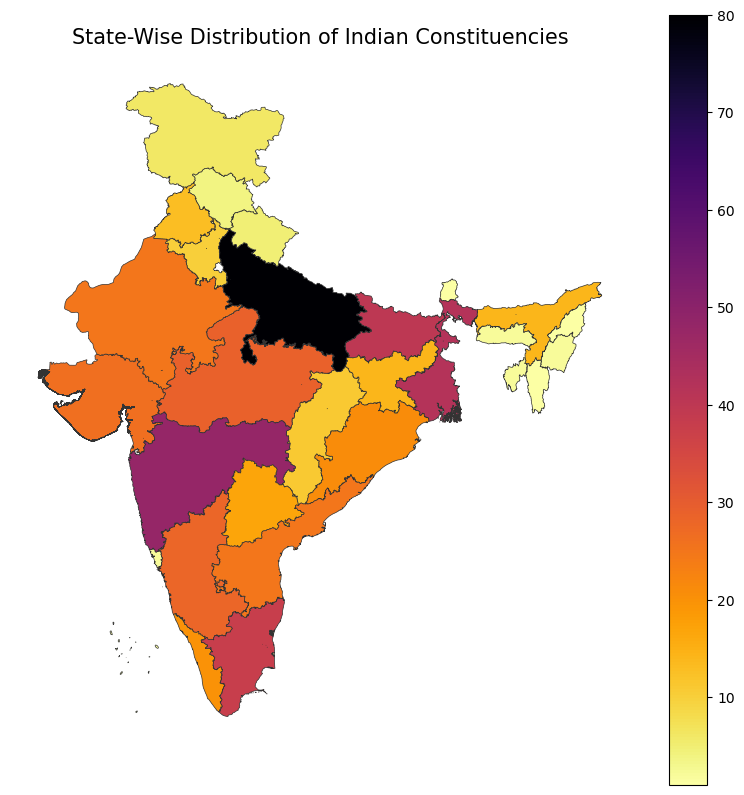

In [14]:
st_con = vote.groupby('STATE').apply(lambda x:x['CONSTITUENCY'].nunique()).reset_index(name = '# Constituency')
shp_gdf = gpd.read_file('Indian_States.shp')
merged = shp_gdf.set_index('st_nm').join(st_con.set_index('STATE'))
fig,ax = plt.subplots(1 , figsize = (10 , 10))
ax.axis('off')
ax.set_title("State-Wise Distribution of Indian Constituencies",fontdict ={'fontsize': '15', 'fontweight':'3'})
fig = merged.plot(column='# Constituency', cmap='inferno_r',linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
st_con.sort_values(by='# Constituency',ascending=False, inplace=True)
fig2 = px.bar(st_con, x = 'STATE', y='# Constituency',color='# Constituency', labels = {'pop':'Contituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India',template='plotly_dark')
fig2.show()

# Oberservation

Uttar Pradesh. Maharashtra and west bengal- The states have the most number of constituencies. There exists a direct relationship of count constituencies and population. The Constituencies are divided based on population of 1971- and this shall remain till the year 2026. Although currently Bihar has most population, west bengal has the 3rd highest constiuency count based on the above fact.

### Lets create a subBrust image of all the states and Constitiuencies

In [15]:
st_con_vt = vote[['STATE','CONSTITUENCY','TOTAL ELECTORS']]
fig = px.sunburst(st_con_vt,path=['STATE','CONSTITUENCY'],values="TOTAL ELECTORS",color = 'TOTAL ELECTORS',color_continuous_scale='viridis_r')
fig.update_layout(title_text = 'Sunbrust Image of State and Constituency by Voters',template = 'plotly_dark')
fig.show()

# Party Level Analysis

### Which Parties have been present in most constituencies and states?

In [16]:
vote_party = vote[vote['PARTY']!= 'NOTA']
party_cnt = vote_party.groupby('PARTY').apply(lambda x:x['CONSTITUENCY'].count()).reset_index(name = '# Constituency')
party_st = vote_party.groupby('PARTY').apply(lambda x:x['STATE'].nunique()).reset_index(name='# State')
party_cnt.sort_values(by='# Constituency',ascending=False,inplace=True)
party_top_cn =party_cnt[:25]
party_top_all = pd.merge(party_top_cn,party_st,how='inner',left_on='PARTY',right_on='PARTY')
fig = px.scatter(party_top_all, x='# Constituency', y='# State',color = '# State',size = '# Constituency',hover_data=['# State'])
fig.update_layout(title_text='Constituency vs Statewise participation for the most contesting Political Parties',template='plotly_dark')
fig.show()

# Observation 

The Bharatiya Janata Party (BJP) and Indian National Congress (INC) have participated in the most number of constituencies all over India. While BJP leads in the number of constituency contested, INC wins in terms of the number of States. While these are the major parties to contest almost all over India, we see the rest of the parties have restricted themselves to a handfull of states.

## What has been the performance of the Parties Statewise?

Text(0.5, 1.0, 'Statewise report card for the Political Parties in India')

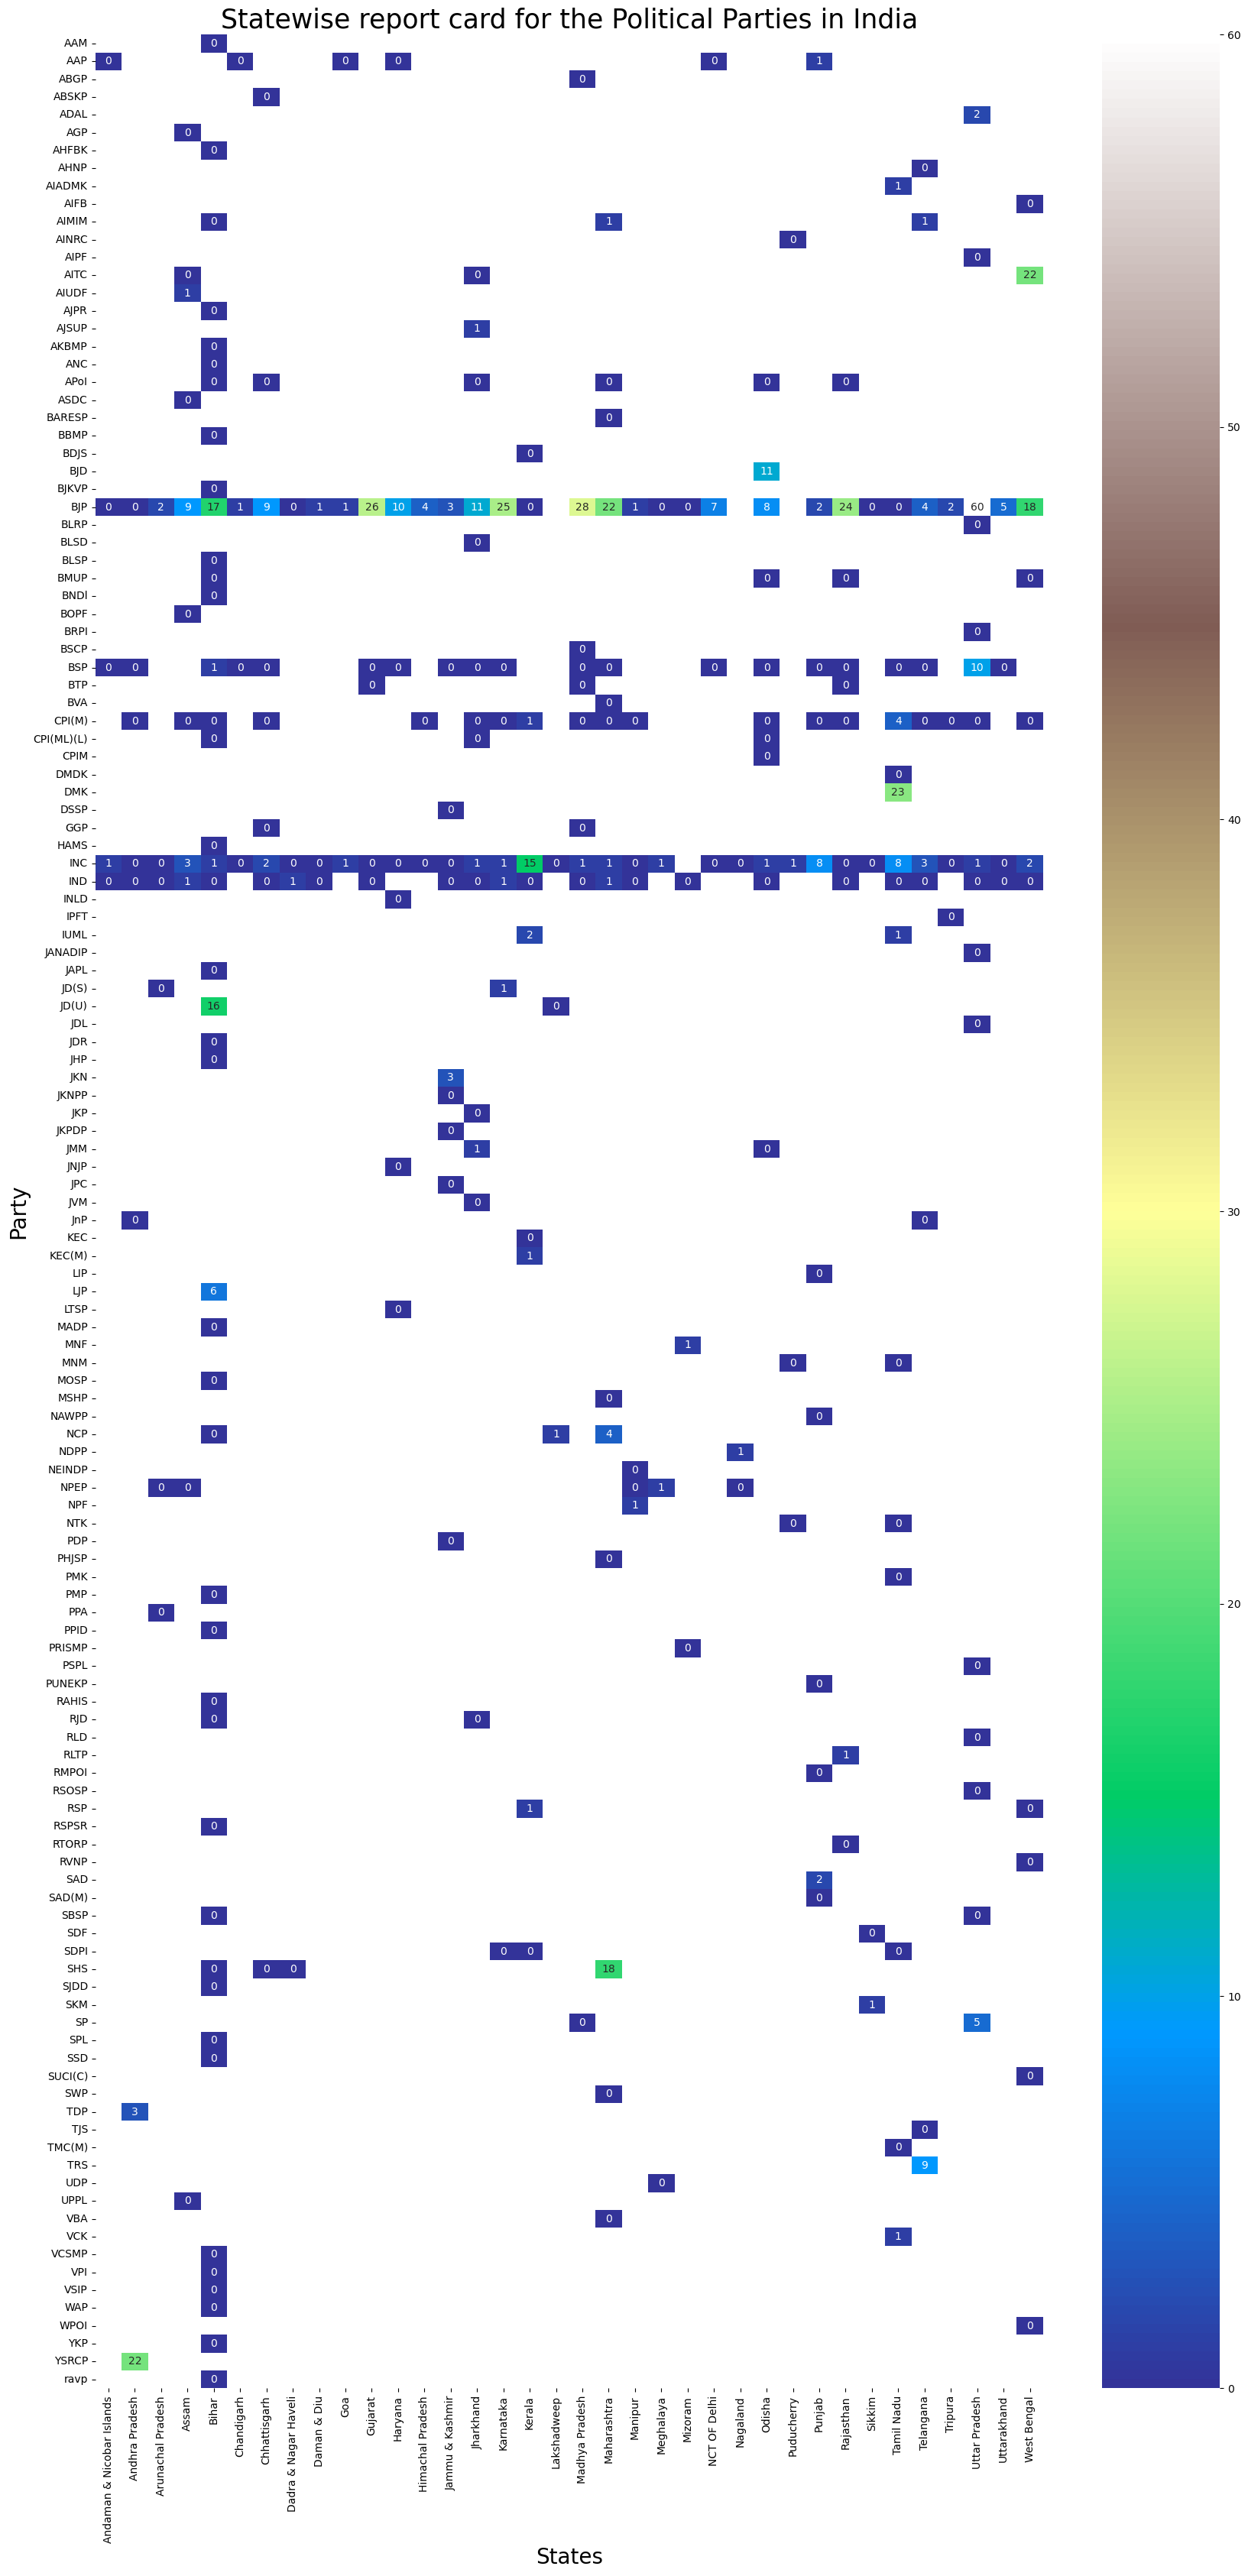

In [17]:
st_party = vote_party.groupby(['PARTY','STATE']).apply(lambda x:x['WINNER'].sum()).reset_index(name='Wins')
pvt_st_party = pd.pivot(st_party, index='PARTY',columns ='STATE',values='Wins')
plt.figure(figsize=(20,40))
sns.heatmap(pvt_st_party,annot=True,fmt='g',cmap='terrain')
plt.xlabel('States', size = 20)
plt.ylabel("Party",size = 20)
plt.title('Statewise report card for the Political Parties in India',size= 25)

# Which party has won the most constituencies?

In [18]:
party_win = vote.groupby('PARTY').apply(lambda x:x['WINNER'].sum()).reset_index(name = '# Wins')
party_win.sort_values(by= '# Wins',ascending=False, inplace=True)
top_party_win=party_win[0:15]
fig = px.bar(top_party_win,x='PARTY',y='# Wins', color='# Wins',title='Win Counts by a Poltical Party in 2019')
fig.update_layout(title_text = 'Win Counts by a Political Party in 2019',template='plotly_dark')
fig.show()

# Observation


 As seen from the data, In 2019, BJP has won the maximum constituencies all over India. The Image below the introduction also suggests the same. The distribution of all the parties is presented below. INC, who stood 2nd in the number of victories had only 52, which is practically 1/6th of the constituencies won by BJP

## What has been the general Win vs Loss relationship for the Parties in 2019?

In [19]:
party_cnt_win = pd.merge(party_cnt, party_win, how='inner',left_on='PARTY',right_on='PARTY')
party_cnt_win['LOST']=party_cnt_win['# Constituency']-party_cnt_win['# Wins']
party_win_count = party_cnt_win[['PARTY','# Wins']]
party_win_count['Verdict']='Constituency Won'
party_loss_count=party_cnt_win[['PARTY','LOST']]
party_loss_count['Verdict']='Constituency Lost'
party_win_count.columns=['Party','Counts','Verdict']
party_loss_count.columns=['Party','Counts','Verdict']
top_party_win_cnt=party_win_count[:15]
party_loss_count_count=party_loss_count[:15]
party_win_loss=pd.concat([top_party_win_cnt,party_loss_count_count])
fig = px.bar(party_win_loss,x='Party',y='Counts',color='Verdict')
fig.update_layout(title_text='Win vs Loss Analysis for the Top Parties',template='plotly_dark')
fig.show()

# Observation

As seen in the above chart, the 2019 elections have been extremely lucky for parties like BJP,SHS or DMK. But it has been a major failure for the rest of the parties, where they have lost more than they won.

# Politician Level Analytics

## What is the Gender Ratio of the Contestants? Also the Gender Ratio of the Winners?

In [20]:
vote_gender = vote[vote['PARTY']!= 'NOTA']
gender_overall = vote_gender.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gender_overall['Category']='OverAll Gender Ratio'
winners = vote_gender[vote_gender['WINNER'] == 1]
gender_winner = winners.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gender_winner['Category'] = 'Winning Genter Ratio'
gender_overall_win = pd.concat([gender_winner,gender_overall])
fig = px.bar(gender_overall_win, x='GENDER',y='Counts',color='Category', barmode='group')
fig.update_layout(title_text = 'Participation vs Win Counts analysis for the Gender',template='plotly_dark')
fig.show()

# Observation

 Out of the total list of participants only 12.78% (258 out of 2018) are female politicians while 87.22% (1760 out of 2018) are  male. Upon considering the winner, Total winner is 539 in that 14.1% are female and 85.899% are male.The Gender ratio is not very well distributed as can  be from above presentation.

# What is the Educational Qualification of our politicians ?

In [21]:
edu_valid = vote[vote['PARTY'] != 'NATA']
edu_count = edu_valid.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig = go.Figure(data=[go.Pie(labels= edu_count['EDUCATION'], values= edu_count['Counts'],pull=[0.1,0.2,0,0.1,0.2,0,0.1,0.2,0,0.1,0.2,0.1])])
fig.update_layout(title_text='Overall Education Qualification of all the Nominees', template = 'plotly_dark')
fig.show()

In [22]:
edu_won= edu_valid[edu_valid['WINNER']==1]
edu_won_count = edu_won.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig2 = go.Figure(data=[go.Pie(labels=edu_won_count['EDUCATION'],values=edu_won_count['Counts'],pull=[0.1,0.2,0,0.1,0.2,0,0.1,0.1,0.2,0,0.1,0.2],title='Education Qualification of thje winners')])
fig2.update_layout(title_text='Education Quatlification of the Winner',template='plotly_dark')
fig2.show()

# Observation

The total percentage of Graduate+ educated people contesting in the election is 67.12%, which has increased to 72.17% of the winners. This is actually a positive sign, as educated politicians are a very big factor towards a country's development. But still around 28% of the politicians have received no professional degree. Hope with passing time, we improve upon this factor, and consider the educational qualification as a primary requirement while voting!

## What is the relationship of Age and Politics?

In [23]:
age_count = edu_valid.groupby(['AGE','GENDER']).apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(age_count, x='AGE',y='Counts',color='GENDER',marginal='violin',title='Age Count Distribution among the politicians')
fig.update_layout(title_text = 'Age Countd Distribution among the politicians', template = 'plotly_dark')
fig.show()

# Observation

Most number of female politicians have their average age between 45-50, while for male politician it range from 50-60 age.The average of amel politians is more as compared to female politicians contesting for the lok Sabha elections.

# What relation does the Politician category have with the election result

In [24]:
vote_cat = vote[vote["PARTY"]!= 'NOTA']
cat_overall = vote_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_overall['Category'] = 'Overall Category Counts'
winner_cat = vote_gender[vote_gender['WINNER']==1]
cat_winner = winner_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_winner['Category']='Winning Category Ratio'
cat_overall_win = pd.concat([cat_winner,cat_overall])
fig = px.bar(cat_overall_win, x='CATEGORY', y='Counts', color='Category',barmode='group')
fig.update_layout(title_text= 'Participatiom vs win counts for the Category in Politics', template='plotly_dark')
fig.show()

# Observation

The Category Participation of General-SC_ST have been in the ratio of 68.97..18.97.12.04- while as of the winners tha ratios have been modified to 74.02.15.76.10.20.

# Have the politician been involved with Criminal activities?

In [25]:
crime_count = edu_valid.groupby('CRIMINAL CASES').apply(lambda x:x['NAME']).reset_index(name='Counts')
fig = px.histogram(crime_count, x='CRIMINAL CASES', y='Counts', marginal='violin')
fig.update_layout(title_text='Criminal Cases Distribution among the politicians',template='plotly_dark')
fig.show()

# Observations

Many politicians have been associated with criminal activities. Always these cases pressed need not be genuine, but obviously, when its multiple- this is a serious issue. We must take the responsibility while voting, as its our duty to choose the right person- as a duty towards the nation.

# Plotting the Assests vs Liabilities amount for Winning Politicians (W.R.O state)

In [26]:
as_liab_name = edu_valid[['NAME','PARTY','ASSETS','LIABILITIES','STATE','CONSTITUENCY','WINNER']]
as_liab_name.WINNER.replace({1:'Yes',0:'No'},inplace=True)
win_as_liab_name= as_liab_name[as_liab_name['WINNER']=='Yes']
win_as_liab_name.sort_values(by='ASSETS', ascending=False,inplace=True)
fig = px.scatter(win_as_liab_name, x='ASSETS',y='LIABILITIES',color='STATE',size='ASSETS',hover_data=(['NAME','PARTY','CONSTITUENCY','STATE','WINNER']),title='Assets vs Liabilities for thew winning politicians')
fig.update_layout(title_text = 'Assests vs Liabilities for the Winning Politicians',template='plotly_dark')
fig.show()

# Observations

The assets and liabilities of the Winning politicians have been plotted. The parameters vary largely depending on the business/services they are associated with besides politics. No valid correlation could be inferred with respect to assets and liabilities.

# Prediction

In [27]:
vote_df = vote[vote['PARTY']!='NOTA']
vote_df['GENDER'].replace({'MALE':1,'FEMALE':2},inplace= True)
vote_df['CATEGORY'].replace({'GENERAL':1,'SC':2,'ST':3},inplace=True)
i = 1
parties_dict={}
for j in vote_df['PARTY']:
    if j in parties_dict:
        continue
    else:
        parties_dict[j]=i
        i+=1
        
vote_df['PARTY'].replace(parties_dict, inplace=True)
a=1
edu_dict = {}
for b in vote_df['EDUCATION']:
    if b in edu_dict:
        continue
    else:
        edu_dict[b]=a
        a+=1
        
vote_df['EDUCATION'].replace(edu_dict,inplace=True)
df1 = vote_df[['STATE','CONSTITUENCY','WINNER','PARTY','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS','LIABILITIES']]
num_cols = ['PARTY','EDUCATION','CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS','ASSETS','CATEGORY','LIABILITIES','GENDER']
dataset = pd.get_dummies(df1)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scalling_columns = num_cols
dataset[scalling_columns]= standardScaler.fit_transform(dataset[scalling_columns])
dataset.head()

WINNER     PARTY    GENDER  CRIMINAL CASES       AGE  CATEGORY  EDUCATION  \
0       1 -0.628979 -0.382872        6.620242 -0.023051  2.251127  -1.242514   
1       0 -0.583879 -0.382872       -0.190426  0.145491  2.251127  -0.872637   
2       0 -0.538780 -0.382872        0.202498 -0.023051  2.251127  -1.242514   
4       1 -0.628979 -0.382872        0.464446  0.482577  0.816718  -0.502761   
5       0 -0.493681 -0.382872       -0.190426 -0.444408  0.816718  -0.872637   

   TOTAL VOTES  TOTAL ELECTORS    ASSETS  ...  SYMBOL_Tiller  \
0     0.332957       -0.538876 -0.311731  ...              0   
1     0.103781       -0.538876 -0.274420  ...              0   
2     0.085873       -0.538876 -0.230717  ...              0   
4     1.387657        0.876978 -0.139047  ...              0   
5     0.559766        0.876978  0.005336  ...              0   

   SYMBOL_Tractor Chalata Kisan  SYMBOL_Triangle  SYMBOL_Truck  \
0                             0                0             0   
1                             0                0             0   
2                             0                0             0   
4                             0                0             0   
5                             0                0             0   

   SYMBOL_Two Leaves  SYMBOL_Tyres  SYMBOL_Umbrella  SYMBOL_Walking Stick  \
0                  0             0                0                     0   
1                  0             0                0                     0   
2                  0             0                0                     0   
4                  0             0                0                     0   
5                  0             0                0                     0   

   SYMBOL_Water Melon  SYMBOL_Whistle  
0                   0               0  
1                   0               0  
2                   0               0  
4                   0               0  
5                   0               0  

[5 rows x 712 columns]

In [28]:
df_not_winner = dataset[dataset.WINNER == 0]
df_winner = dataset[dataset.WINNER == 1]
df_winner_unsampled = resample(df_winner, replace=True, n_samples=1452, random_state=0)
df_total_unsampled = pd.concat([df_not_winner, df_winner_unsampled])
df_total_unsampled.WINNER.value_counts()
y = df_total_unsampled['WINNER']
x = df_total_unsampled.drop(['WINNER'],axis=1)
rf_scores = []
for k in range(1,60):
    randomforest_classifier = RandomForestClassifier(n_estimators=k, random_state=0)
    score = cross_val_score(randomforest_classifier,x,y,cv=10)
rf_scores.append(score.mean())
fig = px.scatter(x=[k for k in range(59, 60)],y=rf_scores, color=rf_scores, size=rf_scores)
fig.update_layout(title_text='Assets vs Liablities for the winning Politicians',template='plotly_dark')
fig.show()

In [29]:
randomforest_classifier= RandomForestClassifier(n_estimators=38,random_state=0)
score=cross_val_score(randomforest_classifier,x,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 96.2131


Observation We have reached an accuracy percentage of 96.21% with our model. Will work on to improve the model further- to increase the accuracy.